In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/employee-attrition/WA_Fn-UseC_-HR-Employee-Attrition.csv


# Objective
* To identify the different factors that drive attrition
* To make a model to predict if an employee will attrite or not

## Importing required Libraries and loading the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

#algorithms to use
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

#for tuning the model
from sklearn.model_selection import GridSearchCV

#to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("/kaggle/input/employee-attrition/WA_Fn-UseC_-HR-Employee-Attrition.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Lets look at the data and try to understand it

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Observations:
- There are 1470 values and  no missing values.
- we have a total of 35 columns where 26 are numeric and rest are objects.
- Employee Number is an ID and employee count is misterious,looks like it is 1 for everyone. If that is so, we should drop this.
- Standard Hours is 80 for everyone. This might also not help in prediction.

## Lets check unique values in each of the parameter

In [6]:
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

# Observations:
- As we have supposed, we can confirm that Employee Count, Over18 and StandardHours have only one value for all.
- Employee number being id is unique key. 
- We can drop these columns.
- Lets also categorize the continuous and categorical variables


In [7]:
data = data.drop(columns=["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"])
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [8]:
numeric_columns = ['DailyRate','Age','DistanceFromHome','MonthlyIncome','MonthlyRate','PercentSalaryHike','TotalWorkingYears',
                      'YearsAtCompany','NumCompaniesWorked','HourlyRate',
                      'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','TrainingTimesLastYear']

# Our output variable is Attrition: Which is a categorical Variable. 
categorical_columns = ['Attrition','OverTime','BusinessTravel', 'Department','Education', 
                       'EducationField','JobSatisfaction','EnvironmentSatisfaction','WorkLifeBalance',
                       'StockOptionLevel','Gender', 'PerformanceRating', 'JobInvolvement',
                       'JobLevel', 'JobRole', 'MaritalStatus','RelationshipSatisfaction']



## Lets perform univariate analysis on all the numeric and then categorical variables.

**Numeric Variables Univariate Analysis**

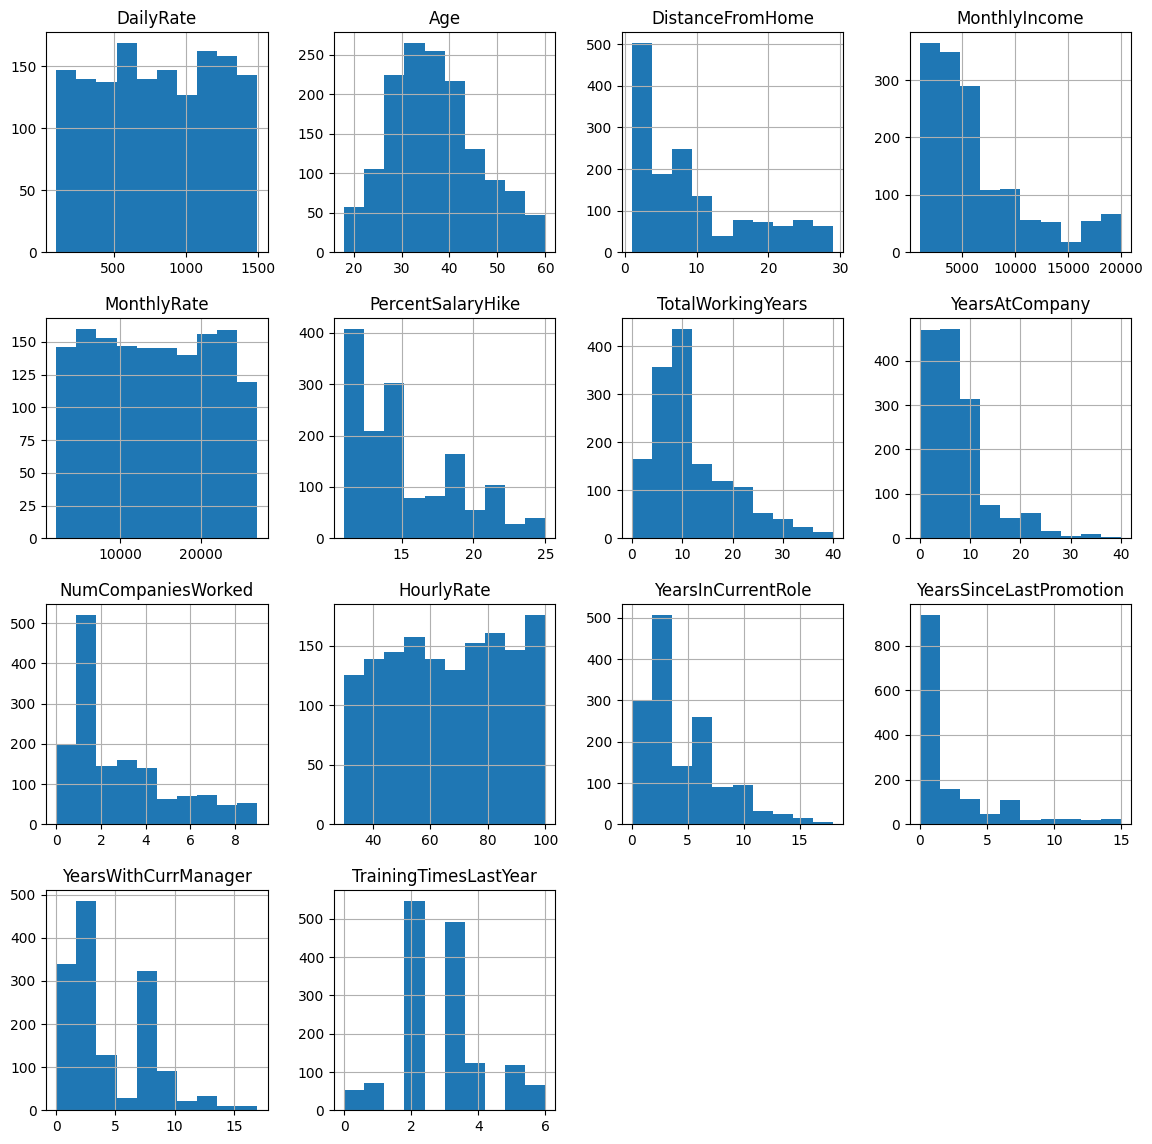

In [9]:
data[numeric_columns].hist(figsize=(14, 14))
plt.show()
    

## Observations:
- The mean age is around 36 ranging between 18 and 60 with normalized distribution, very lightly skewed towards right. Mejority of the workforce is around 25 to 45, which is normal in a company.
- Daily Rates have constant distribution across the range of 100 to 1500.
- Most people live near the office, the mean being 7. There are some people who live a little far off but their number is quite small. 
- Income for most of the staff is concentrated in the cluster of 1000 to 6000. which means that majority of employees are entry level or mid-level.
- Monthly rate is evenly ditributed.
- Salary hike for most of the staff is clustered in range of 11 to 15.
- Most of the staff has experience in 0 to 12 years range, whereby, it decreases progressively.
- Most staff members have worked 0-11 years, where 0 - 6 years is a majority. Many loyal employee are present in the company, if we discount the entry level employee and look at the average, its around 10 years at the company.
- Most people have worked in at least one company. There are quite a few freshers as well.
- Hourly rate is constantly distributed.
- Most employee are in current role for about 2 to 3 years.
- Most of the employees have been promoted in the last year.
- Years in current role and years with current manager look very similar and will have high correlation, this is normal as staying in role for x amount of time will most likely result in working under same manager for x amount of time. 
- Most staff members recieved 2 to 3 training in last year.



**Univariate Analysis of categorical Variables identified**

In [10]:
for col in categorical_columns:
    print(data[col].value_counts(normalize=True))
    print("*"*50)

Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64
**************************************************
OverTime
No     0.717007
Yes    0.282993
Name: proportion, dtype: float64
**************************************************
BusinessTravel
Travel_Rarely        0.709524
Travel_Frequently    0.188435
Non-Travel           0.102041
Name: proportion, dtype: float64
**************************************************
Department
Research & Development    0.653741
Sales                     0.303401
Human Resources           0.042857
Name: proportion, dtype: float64
**************************************************
Education
3    0.389116
4    0.270748
2    0.191837
1    0.115646
5    0.032653
Name: proportion, dtype: float64
**************************************************
EducationField
Life Sciences       0.412245
Medical             0.315646
Marketing           0.108163
Technical Degree    0.089796
Other               0.055782
Human Resources     0.018367
Name: p

## Observations:
- 16% attrition is observed. (This is our output variable)
- Around 28% staff works overtime.
- Around 19% travel frequently on business trips, 10 % never travel and 71% travel when needed. 
- Most of the staff 65% is in R&D followed by 30% in sales and around 4-5% in HR.
- Most of the staff has either a bachelors degree or a masters degree who are from either life sciences background or Medical bacground. Maybe These people constitute the R&D department and Sales department. Around 20% have attended college. 3to 4 % of Doctorate holders who could be in R&D department and rest 10% have poor education backgroud, may be low wage workers.
- Around 60% of the staff rated job satisfaction levels as high and very high which correlates highly with Environment satisfaction being rated high an job involvement being rated high as well. 
- Almost same percent of people have rated job satisfaction, environment satisfaction and job involvement as low.
- Work life balance is in general good.
- We can see only two types of performance ratings given by the company excellent 85% and outstanding 15%. This might be to keep the morale of the employees high. 
- A healthy mix of job roles can be seen which is good.
- The company has 60-40 ratio of Men and Women.
- 45% are married, these might be the candidates who would not want to switch jobs as often, around 35% are single and potential candidates who can switch jobs as they do not carry responsibility of family while moving to another location.
- around 60% are satisfied in their personal life and will look for a stable life, less potential of attrition here.
- The other 30 - 40% (might be single or divorced or having family issues) are potential candidates for attrition.

## Insight
- We should be looking at both the failure (attrition) and success (Retention)
- The reason for this is to make sure the company we are doing analysis for should get recommendations and insights on what they are doing good in retention of talent and to contiue it along with measures to take the curb attrition.
- If insights, observations and recommendations are only for curbing attrition, there could be areas where the company is doing good and making good decisions to retain talent, but our recommendations to curb attrition might conflict with these and lead to attrition from the other side. 
**I came across a good story of [surviver bias](https://www.scribbr.com/research-bias/survivorship-bias/#:~:text=Survivorship%20bias%20occurs%20when%20researchers,a%20subset%20of%20the%20population.) which made me think on these lines for my data analysis.*

## Lets look at Bivariate and Multivariate Analysis

- How does Attrition relate to other categorical values.

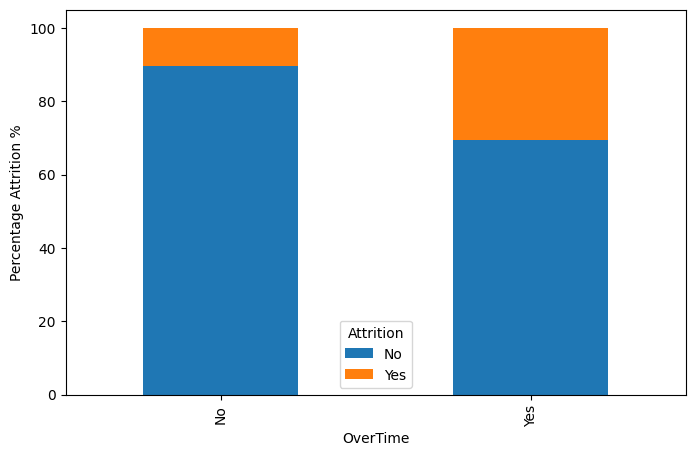

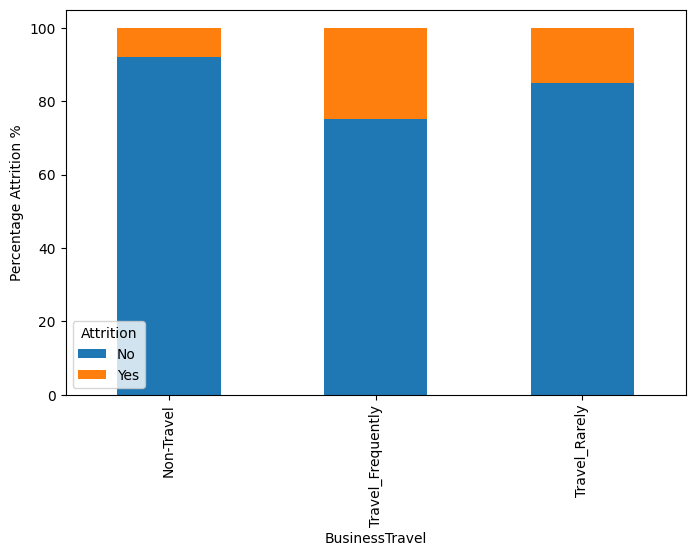

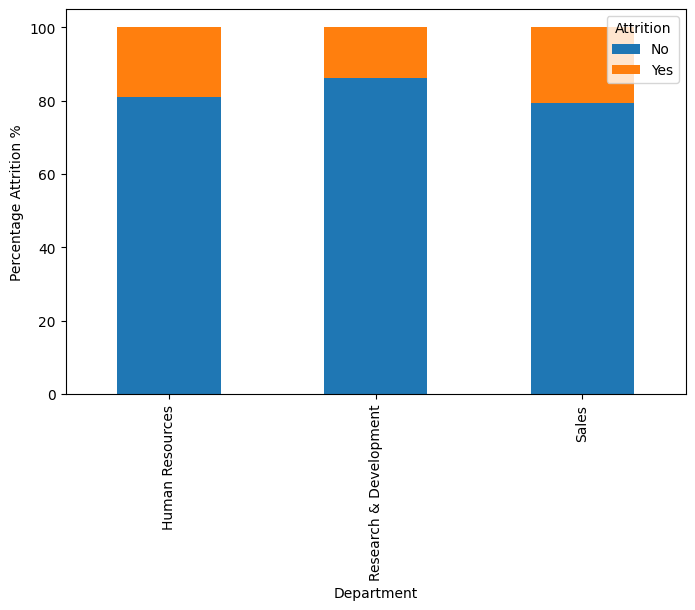

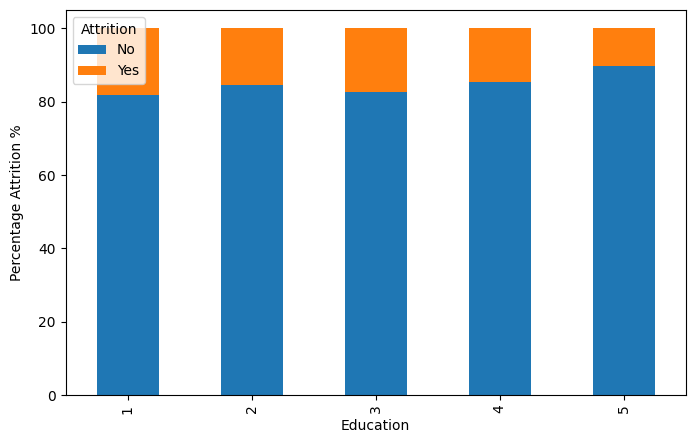

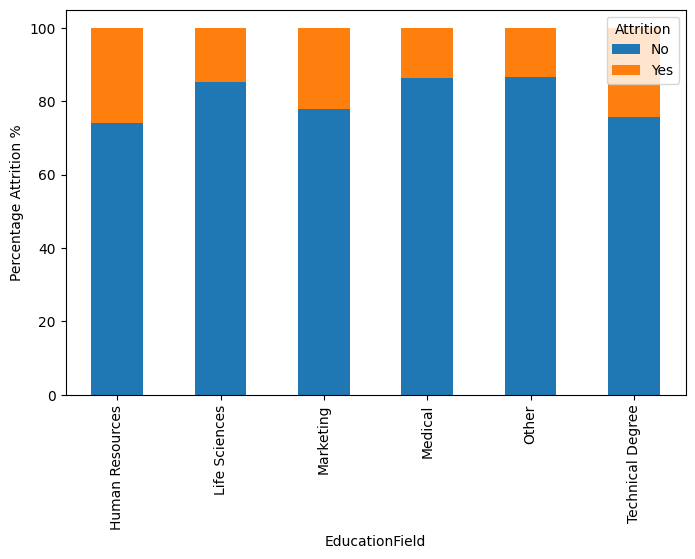

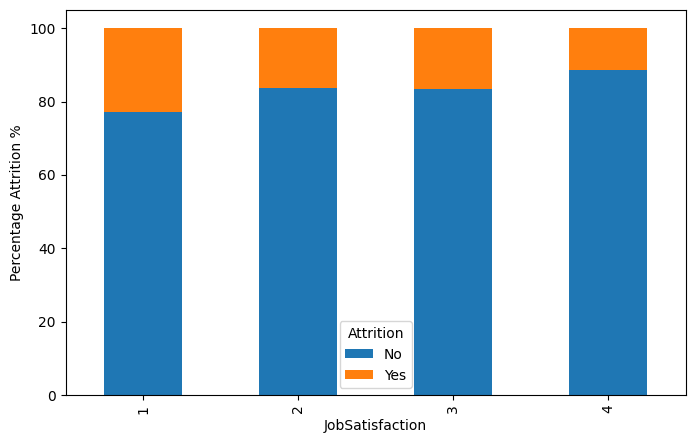

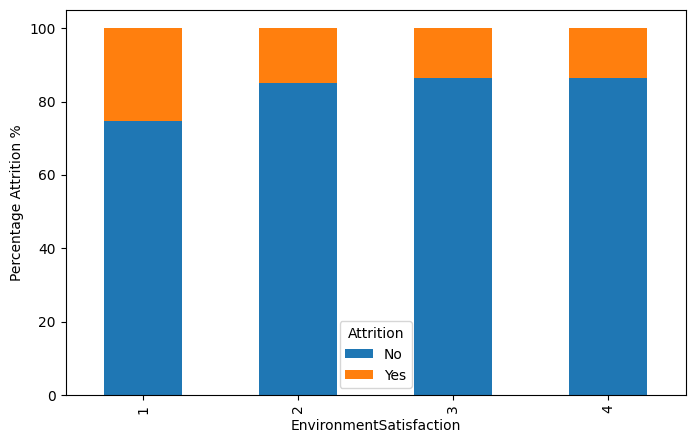

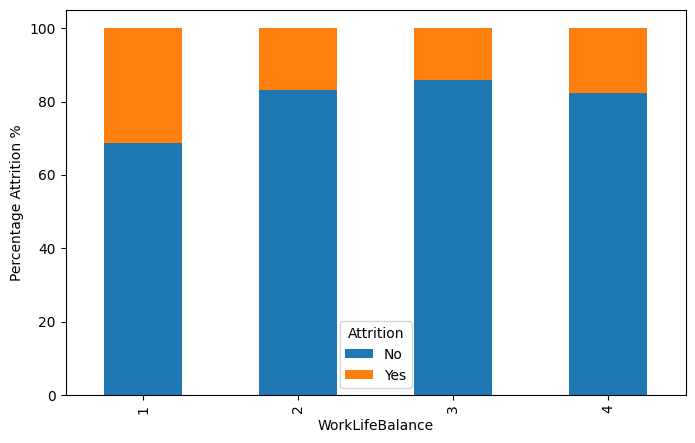

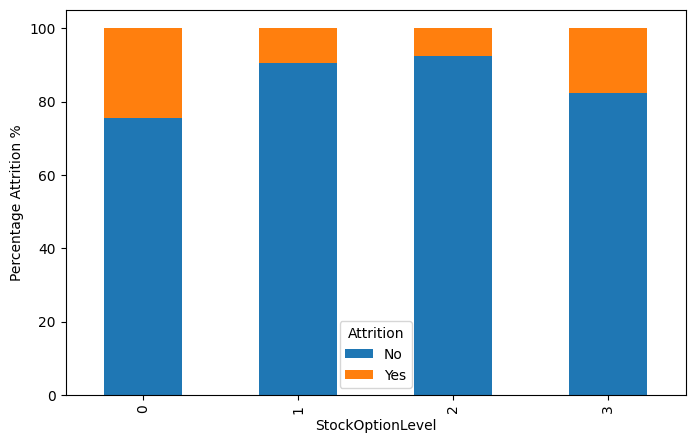

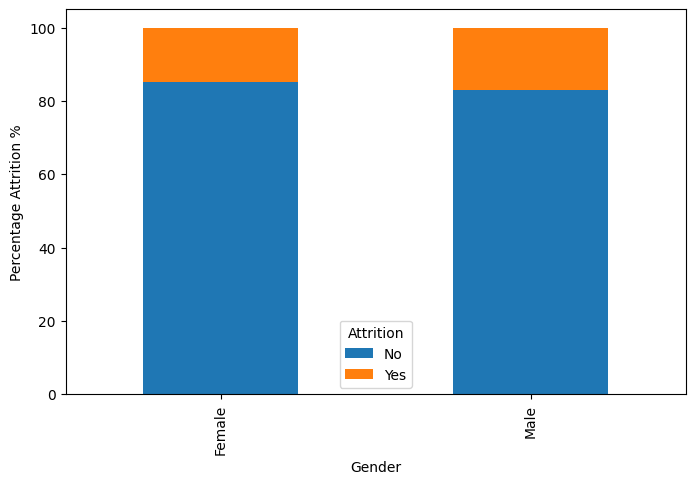

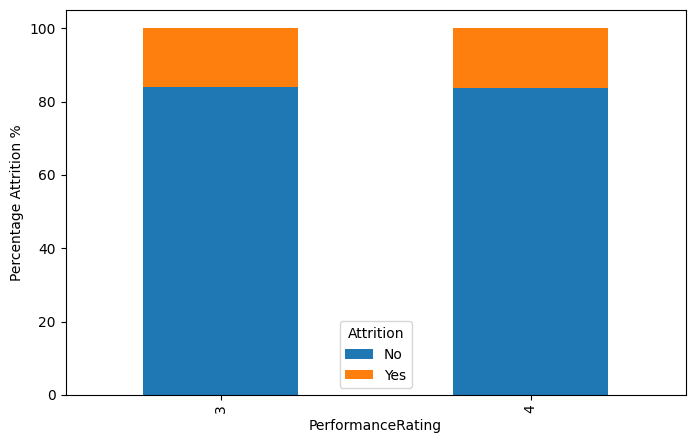

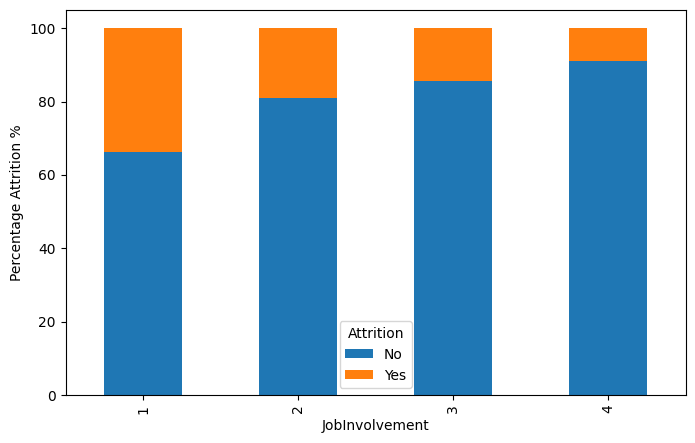

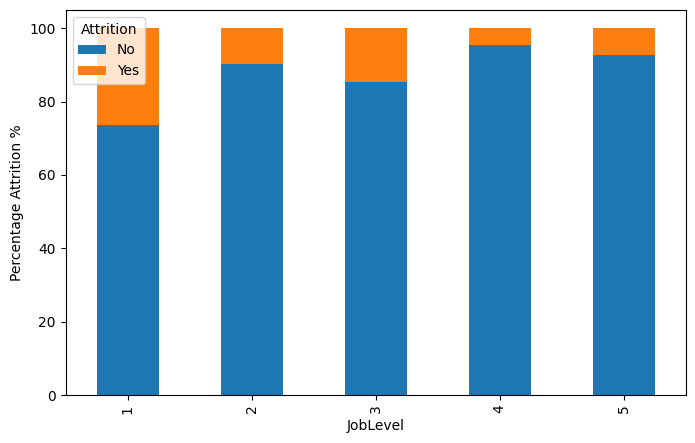

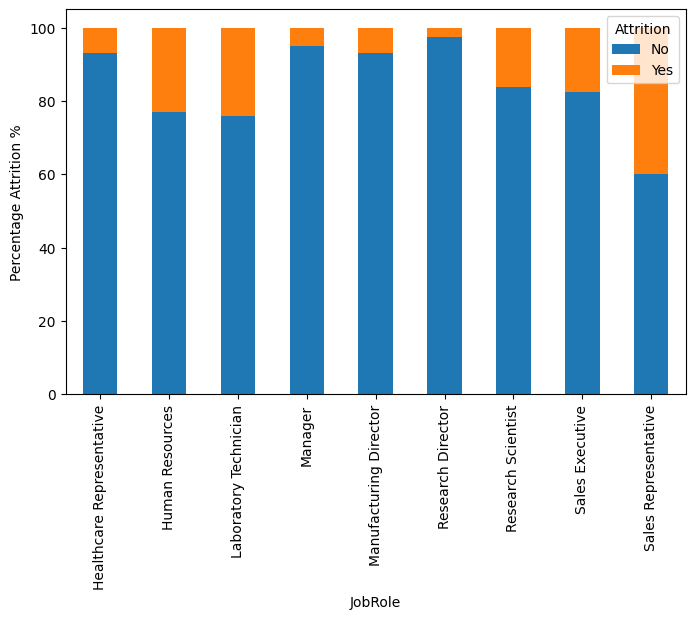

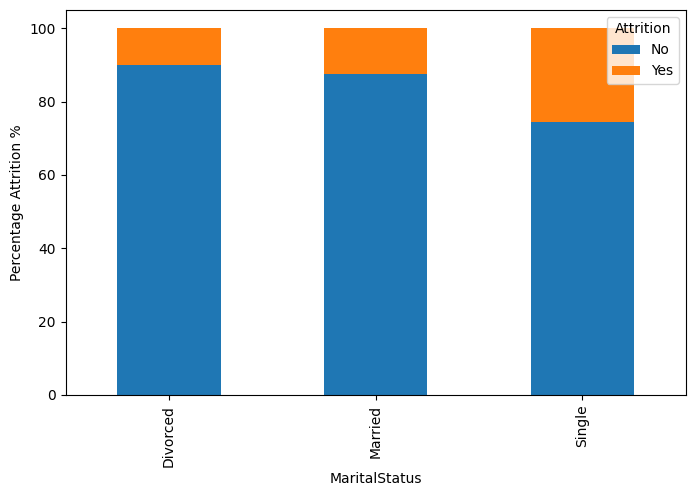

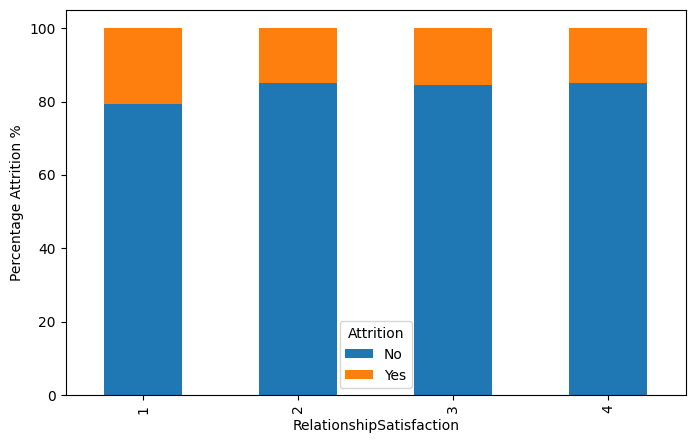

In [11]:
for col in categorical_columns:
    if col != "Attrition":
        # Creating a cross tab with normalized values (0 to 1) and getting the percentages, then plotting a barplot
        (pd.crosstab(data[col], data["Attrition"], normalize="index")*100).plot(kind="bar", figsize=(8,5), stacked=True)
        plt.ylabel("Percentage Attrition %")

## Observations:
- Attrition is more in employees who are working overtime, maybe these employees feel stressed in the work environment.
- Those who travel frequently have high attrition rate, these could be sales personnel. Those who travel rarely also have good amount of attrition, maybe these are scientists going to conferences. (just a hypothesis will need more domain knowledge from company on who are the one who travel rarely for business)
- All the departments have attriton but sales department has higher attrition followed by Human resource department. As from our previous observation we can bolster our assumption that sales guys who travel a lot are prone to attrition.
- Those with bachelors degree and those who have not done college have higher attrition. Maybe some of these people are going back to college to improve their skill level for better future and salary.
- Those from the field of Human resources and those who hold technical degree have high attrition followed by Marketing personnel.
- Those with lower job satisfaction, lower environment satisfaction, lower job involvement attrite more.
- People who do not have stock options are not much tied to the company and attrite more. However, there is attrition in those who have large stock options in the company, these could be older employees who are near the age of retirement. 
- Male employee attrition is slightly more than female attriton, but these need to be subjectively viewed instead of taking at its face value.
- Those who are at lower job level attrite more followed by mid-senior job level.
- Sales representatives have the highest rate of attrition followed by Human resources and Laboratory technicians.
- Performace Rating by the compay has no impact on the employee attrition or staying in the company. This area needs improvement. 
- Looking at the personal info of the employees singles as we had concluded attrite more and those who declared their relationship status as poor attrite. 

## Lets check the relation between numeric variables and attrition rate

In [12]:
data.groupby(["Attrition"])[numeric_columns].mean().T

Attrition,No,Yes
DailyRate,812.504461,750.362869
Age,37.561233,33.607595
DistanceFromHome,8.915653,10.632911
MonthlyIncome,6832.739659,4787.092827
MonthlyRate,14265.779400,14559.308017
PercentSalaryHike,15.231144,15.097046
TotalWorkingYears,11.862936,8.244726
YearsAtCompany,7.369019,5.130802
NumCompaniesWorked,2.645580,2.940928
HourlyRate,65.952149,65.573840


## Observations:
- Variables which do not affect the attriton rate: Monthly Rate, PercentSalaryHike, NumCompaniesWorkedAt, HourlyRate, TrainingTimeLastYear.
- Younger Employees attrite more so do people with lower wages, lower monthly income and people with lower experience (These seem to be related).
- Those who are are getting promoted are likely to attrite, this could be related to people working in current role and years with current manager for lesser time. Those employees who thought they needed a promotion from current role and not given might be potential candidates for attrition.
- Longer commute to work is another factor which leads to more attrition.

## As we have seen a lot of correlations between different factors, lets explore correlation matrix to corroborate what we have assumed based on observations.

<Axes: >

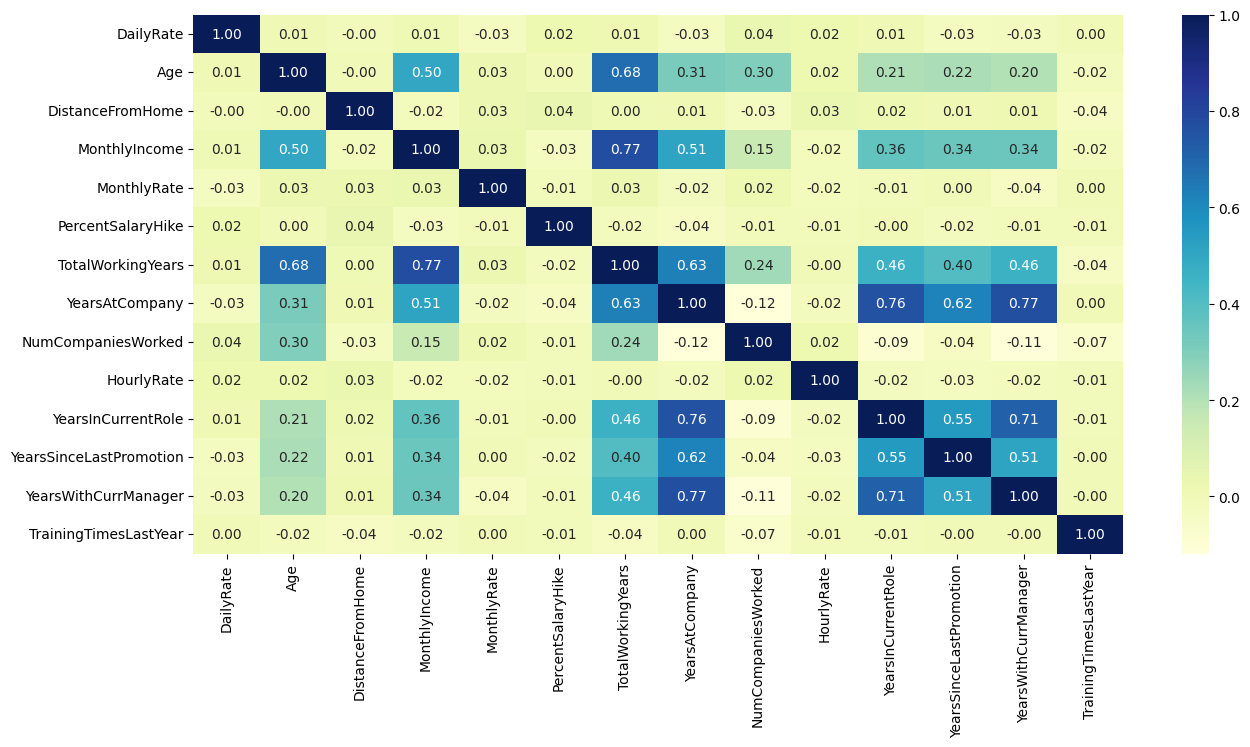

In [13]:
plt.figure(figsize=(15, 7))
sns.heatmap(data[numeric_columns].corr(), annot=True, fmt="0.2f", cmap="YlGnBu")

## Observations:
- Increase in Age, experience leads to higher salary as well as causes the person to be relegated to single role for longer time (maybe in senior management position or C-suit). People with lower age and in lower positions get promoted faster to higher roles. This is consistent with every companies career progression roadmap.
- The promotions slow down as the employee goes into upper rungs.

# Lets build a model for our predicting the attrtion:
1. Linear Discriminant Analysis
2. Quadratic Discriminant Analysis
3. Logistic Regression
4. KNN

# Preparing the data for modeling

In [14]:
# Dummy variables for categorical variables
get_dummy_for = ['BusinessTravel', 'Department','Education', 'EducationField','EnvironmentSatisfaction', 'Gender', 'JobInvolvement','JobLevel', 'JobRole', 'MaritalStatus']

data = pd.get_dummies(data=data, columns=get_dummy_for, drop_first=True)

# Attrition and Overtime
data["OverTime"] = data.OverTime.map({"Yes":1, "No":0})
data["Attrition"] = data.Attrition.map({"Yes":1, "No":0})

data.head()


,Age,Attrition,DailyRate,DistanceFromHome,HourlyRate,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,94,4,5993,19479,8,1,...,False,False,False,False,False,False,True,False,False,True
1,49,0,279,8,61,2,5130,24907,1,0,...,False,False,False,False,False,True,False,False,True,False
2,37,1,1373,2,92,3,2090,2396,6,1,...,False,True,False,False,False,False,False,False,False,True
3,33,0,1392,3,56,3,2909,23159,1,1,...,False,False,False,False,False,True,False,False,True,False
4,27,0,591,2,40,2,3468,16632,9,0,...,False,True,False,False,False,False,False,False,True,False


In [15]:
Y = data["Attrition"]
X = data.drop(columns=["Attrition"])


In [16]:
# Scaling the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,0.446350,0.742527,-1.010909,1.383138,1.153254,-0.108350,0.726020,2.125136,1.591746,-1.150554,...,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,-0.918921,1.458650
1,1.322365,-1.297775,-0.147150,-0.240677,-0.660853,-0.291719,1.488876,-0.678049,-0.628241,2.129306,...,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,1.088232,-0.685565
2,0.008343,1.414363,-0.887515,1.284725,0.246200,-0.937654,-1.674841,1.324226,1.591746,-0.057267,...,-0.191498,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.918921,1.458650
3,-0.429664,1.461466,-0.764121,-0.486709,0.246200,-0.763634,1.243211,-0.678049,1.591746,-1.150554,...,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,1.088232,-0.685565
4,-1.086676,-0.524295,-0.887515,-1.274014,-0.660853,-0.644858,0.325900,2.525591,-0.628241,-0.877232,...,-0.191498,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,1.088232,-0.685565


# Splitting the data into train and test set

In [17]:
# We are stratifying as the data as we already know that the dataset is unbalanced on attrition (is it not?)
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=1, stratify=Y)

## How are we to Evaluate Model
1. Confusion Matrix
    - This will give us true positives, true negatives, false positives, false negatives.
    - The confusion matrix will show us presion: Which result is actually correct, Recall: Which values which were right were correctly predicted.
2. I read the following [article](https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall) for understanding precision and recall.

- What is important in this perticular case:
    - Predicting that the employee will not attrite and he does attrite will create problems for company as it will lose on important talent.
    - So in effect we should reduce the False Negatives. As False Negatives decrease Recall increases.
    - **Focus should be on increasing Recall Value**
    - That means we should be predicitng True Positives well as well.

## Reading the confusion matrix (clockwise):

- True Negative (Actual=0, Predicted=0): Model predicts that an employee would not attrite and the employee does not attrite

- False Positive (Actual=0, Predicted=1): Model predicts that an employee would attrite but the employee does not attrite

- False Negative (Actual=1, Predicted=0): Model predicts that an employee would not attrite but the employee attrites

- True Positive (Actual=1, Predicted=1): Model predicts that an employee would attrite and the employee actually attrites

In [18]:
# Function to calculate metrc scores for each model
def get_metrics(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8, 5))
    sns.heatmap(cm, annot=True, fmt=".2f", xticklabels=["Not Attrite", "Attrite"], yticklabels=["Not Attrite", "Attrite"])
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()

# LDA

In [19]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis()

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       863
           1       0.78      0.45      0.57       166

    accuracy                           0.89      1029
   macro avg       0.84      0.71      0.75      1029
weighted avg       0.88      0.89      0.88      1029



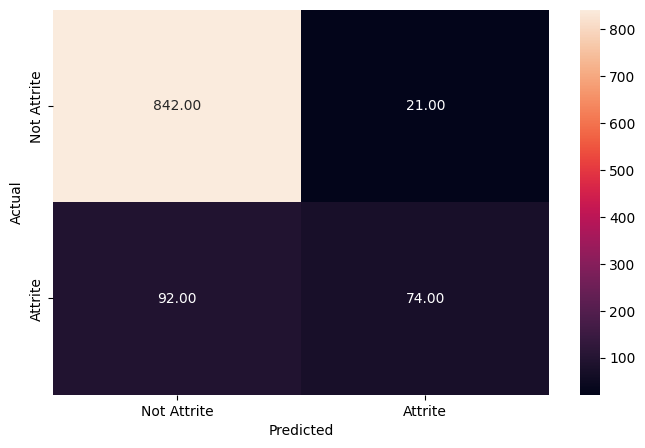

In [20]:
y_pred_train_lda = lda.predict(x_train)
get_metrics(y_train, y_pred_train_lda)

## Observations:
- The precision is 90% for those who will not attrite as well as recall for not attrite is high 98%.
- Precision for Attrite is 78%.
- Recall for Attrite is 45%.
**Our objective is to make sure recall for attrite is high but that is the one which is low 45%**

#### This Model will not give the desired results for the company. The model Fails to justify the objective.


## Lets check the variables which are leading to attrition according to this model

In [21]:
cols = X.columns
coef_lda = lda.coef_
pd.DataFrame(coef_lda, columns=cols).T.sort_values(by=0, ascending=False)

,0
OverTime,0.881231
Department_Research & Development,0.728319
MaritalStatus_Single,0.683043
Department_Sales,0.657201
BusinessTravel_Travel_Frequently,0.603888
YearsAtCompany,0.585226
NumCompaniesWorked,0.516846
JobRole_Human Resources,0.337010
DistanceFromHome,0.314682
JobRole_Sales Executive,0.311130


## Observations for LDA predictions on variables which impact

- Some Features which positively affect Attrition Rate:
    - OverTime
    - Department_Research & Development
    - MaritalStatus_Single
    - Department_Sales
    - BusinessTravel_Travel_Frequently
    - YearsAtCompany
    - NumCompaniesWorked
    - JobRole_Human Resources
    - DistanceFromHome
    - JobRole_Sales Executive
    - JobRole_Sales Representative
- Some Features which negatively affect Attrition Rate:
    - JobInvolvement_3
    - JobInvolvement_2
    - EducationField_Life Sciences
    - JobInvolvement_4
    - MonthlyIncome
    - EducationField_Medical
    - EnvironmentSatisfaction_4
    - EnvironmentSatisfaction_3
    - JobLevel_2
    - EnvironmentSatisfaction_2
    - JobSatisfaction


## Precision Recall curve for LDA
- Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.

In [22]:
def precision_and_recall(precisions, recalls, thresholds):
    plt.figure(figsize=(11, 7))
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    plt.show()

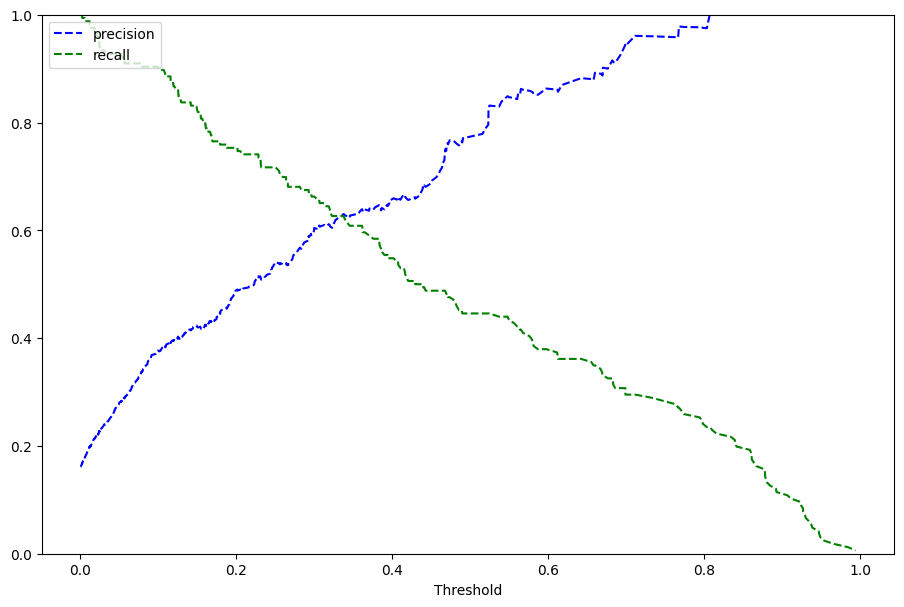

In [23]:
y_scores_lda = lda.predict_proba(x_train) # Give probability of each observation belonging to a each class

precision_lda, recalls_lda, thresholds_lda = precision_recall_curve(y_train, y_scores_lda[:, 1])

# Plotting the curve
precision_and_recall(precision_lda, recalls_lda, thresholds_lda)

## Observations:
- The threshold where precision and recall curves intersect around 0.35 and are balanced.
- Lets try LDA with this threshold


              precision    recall  f1-score   support

           0       0.93      0.93      0.93       863
           1       0.63      0.61      0.62       166

    accuracy                           0.88      1029
   macro avg       0.78      0.77      0.77      1029
weighted avg       0.88      0.88      0.88      1029



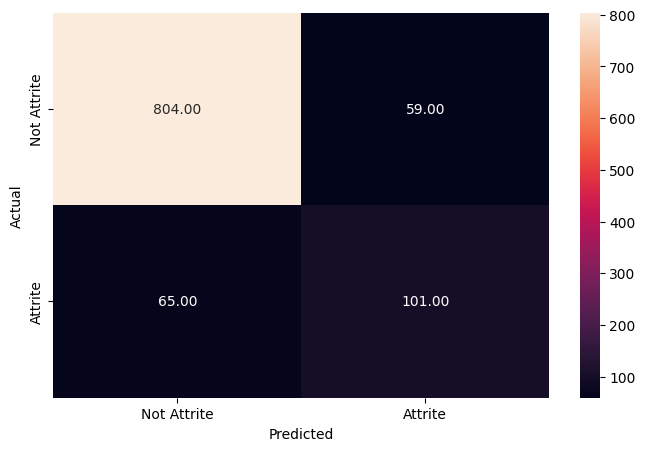

In [24]:
optimal_threshold_lda = 0.35
y_pred_train_lda = lda.predict_proba(x_train)
get_metrics(y_train, y_pred_train_lda[:, 1]>optimal_threshold_lda)

## Observations:
- The precision for attrite has dropped  to 63%.
- The recall value for Attrite has increased to 61%.


**While this is an improvement, and model is getting information on people who will attrite with ok performance, it might not be sufficient, we need to check other models**

### Lets look at performance of our tuned model on test data

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       370
           1       0.50      0.62      0.55        71

    accuracy                           0.84       441
   macro avg       0.71      0.75      0.73       441
weighted avg       0.86      0.84      0.85       441



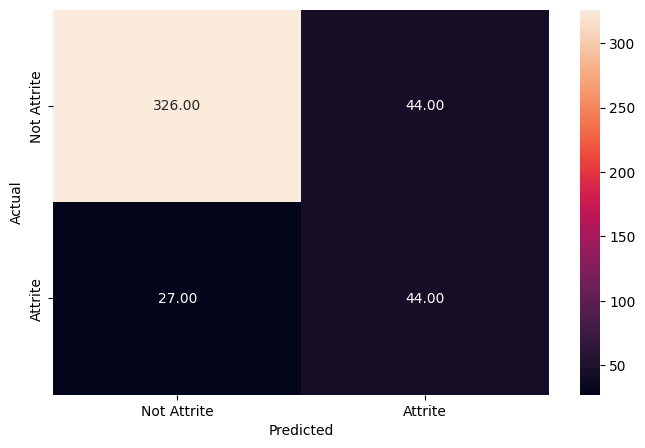

In [25]:
y_pred_test_lda = lda.predict_proba(x_test)
get_metrics(y_test, y_pred_test_lda[:, 1] > optimal_threshold_lda)

## Observations:
- The model is giving more or less similar performace. Model has generalized well.
- Average Precision and recall are ok. 

## Quadratic Discrimimant Analysis



In [26]:
# Fitting to QDA model:
qda = QuadraticDiscriminantAnalysis()
qda.fit(x_train, y_train)

QuadraticDiscriminantAnalysis()

              precision    recall  f1-score   support

           0       1.00      0.13      0.23       863
           1       0.18      1.00      0.31       166

    accuracy                           0.27      1029
   macro avg       0.59      0.56      0.27      1029
weighted avg       0.87      0.27      0.24      1029



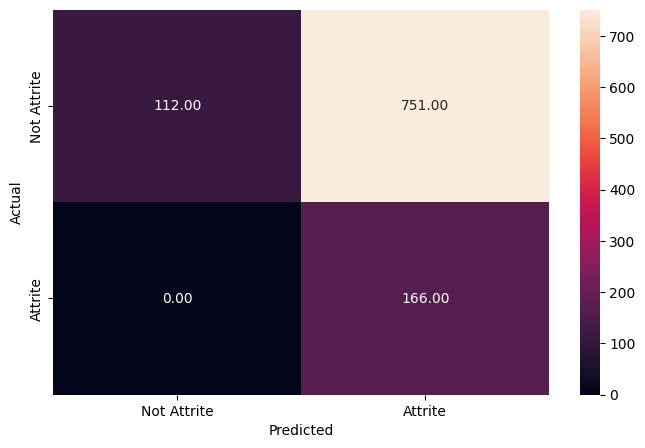

In [27]:
y_pred_train_qda = qda.predict(x_train)
get_metrics(y_train, y_pred_train_qda)

              precision    recall  f1-score   support

           0       0.94      0.14      0.24       370
           1       0.18      0.96      0.30        71

    accuracy                           0.27       441
   macro avg       0.56      0.55      0.27       441
weighted avg       0.82      0.27      0.25       441



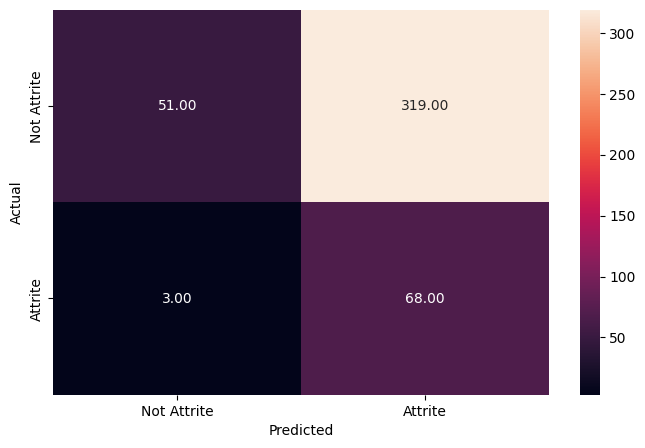

In [28]:
# Check on test data : I have a feeling this is overfitting (common with QDA)
y_pred_test_qda = qda.predict(x_test)
get_metrics(y_test, y_pred_test_qda)

## Observations:
- Very high recall for class 1 (which is what we want), but has very low recall for not attrite (class 0)
- High number of false Positives, this will make the company to splurge a lot of resources on people who are not at risk of attriting and thereby would be wasting company resources. 
- This model is of no use for the company.

# Logistic Regression: (very popular)
- Generally used for binary regression problem, similar to what we have at hand right now.
- Uses sigmoid function something on the lines: P(y)=1/exp(1 + exp(-x))

In [29]:
# Fitting data to logistic regression model
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       863
           1       0.76      0.49      0.60       166

    accuracy                           0.89      1029
   macro avg       0.83      0.73      0.77      1029
weighted avg       0.88      0.89      0.88      1029



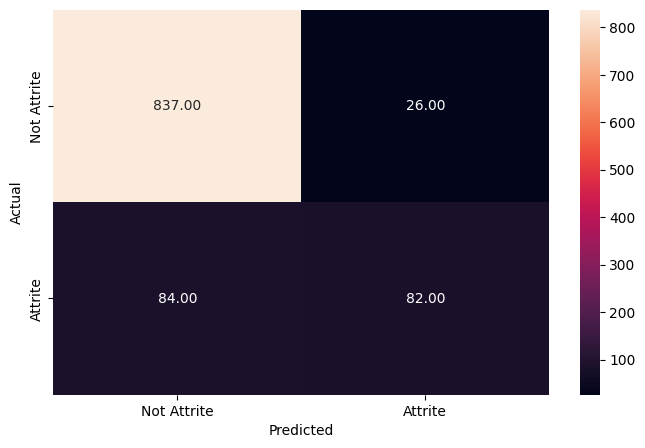

In [30]:
# Performance on train data
y_pred_train_lr = lr.predict(x_train)
get_metrics(y_train, y_pred_train_lr)

## Observations:
- This model gives poor recall value for 1 which we want to increase. Its 49% and will lead to loss of talent.
- precision and recall are good for 0.
- precesion for 1 is 76%, meaning this will predict 76% of the time correctly if the employee will attrite.

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       370
           1       0.67      0.52      0.59        71

    accuracy                           0.88       441
   macro avg       0.79      0.74      0.76       441
weighted avg       0.87      0.88      0.88       441



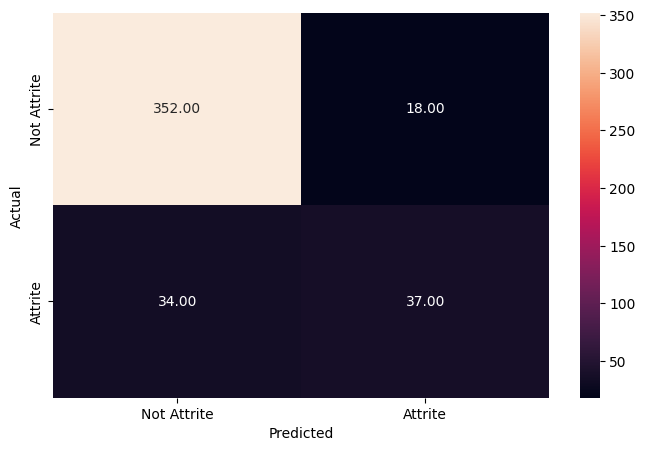

In [31]:
# Trying the model on test data
y_pred_test_lr = lr.predict(x_test)
get_metrics(y_test, y_pred_test_lr)

## Observations:
- The model seems to perform similar to train data on test data as well. The model is well generalized.
- However, with low recall for 1, we need to finetune the model.
- From the confusion matrices of train and test data, there are a lot of people who will attrite and our model will not predict. 

## As this is a popular model lets see how it sees the variables affecting the attrition rate.
- We need to be mindful of one thing, logistic regression gives logs coefficients for variables, exponetiating it will help us compare it with linear regression we did.

In [32]:
#printing the coefficients of logistic regression
cols=X.columns
odds = np.exp(lr.coef_[0]) #finding the odds
# adding the odds to a dataframe and sorting the values
pd.DataFrame(odds, x_train.columns, columns=['odds']).sort_values(by='odds', ascending=False) 


,odds
OverTime,2.384065
YearsAtCompany,2.351747
MaritalStatus_Single,2.013547
BusinessTravel_Travel_Frequently,1.981548
NumCompaniesWorked,1.671841
Department_Sales,1.572317
YearsSinceLastPromotion,1.512878
DistanceFromHome,1.484478
BusinessTravel_Travel_Rarely,1.430745
MaritalStatus_Married,1.321491


## Observations:
- We see that odds which are positively and negatively affecting the attrition rate seem to be quite similar for logistic regression and LDA. This means they are capturing the same pattern and giving nearly the same conclusions from the dataset.
- The odds of an employee working overtime to attrite are 2.6 times the odds of one who is not, probably due to the fact that working overtime is not sustainable for an extended duration for any employee, and may lead to burnout and job dissatisfaction.
- The odds of an employee traveling frequently to attrite are double the odds of an employee who doesn't travel as often.
- The odds of single employees attriting are 1.8 times (80% higher than) the odds of an employee with another marital status.

## Precision Recall Curve

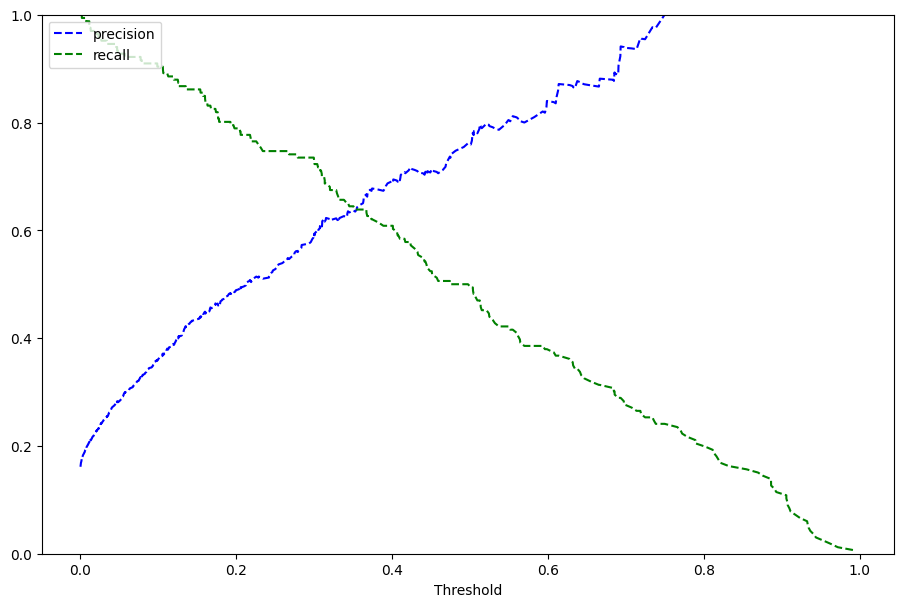

In [33]:
y_scores_lr=lr.predict_proba(x_train) #predict_proba gives the probability of each observation belonging to each class


precisions_lr, recalls_lr, thresholds_lr = precision_recall_curve(y_train, y_scores_lr[:,1])

precision_and_recall(precisions_lr, recalls_lr, thresholds_lr)


The threshold where presion and recall are balanced is 0.35 again!!

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       863
           1       0.64      0.64      0.64       166

    accuracy                           0.88      1029
   macro avg       0.78      0.79      0.79      1029
weighted avg       0.88      0.88      0.88      1029



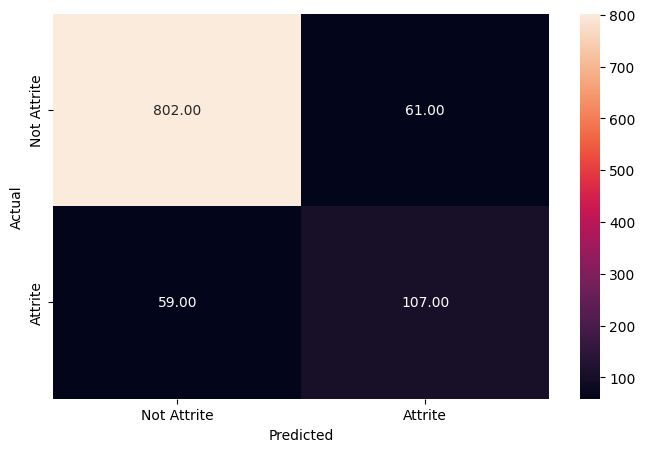

In [34]:
y_pred_train_lr = lr.predict_proba(x_train)
get_metrics(y_train, y_pred_train_lr[:,1]> 0.35)

## Observations:
- The tuned model gives better results on recall for 1 with 64%.
- The precision has remained more or less similar.
- Precision and recall values for 0 have remained more or less similar.

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       370
           1       0.51      0.63      0.57        71

    accuracy                           0.84       441
   macro avg       0.72      0.76      0.74       441
weighted avg       0.86      0.84      0.85       441



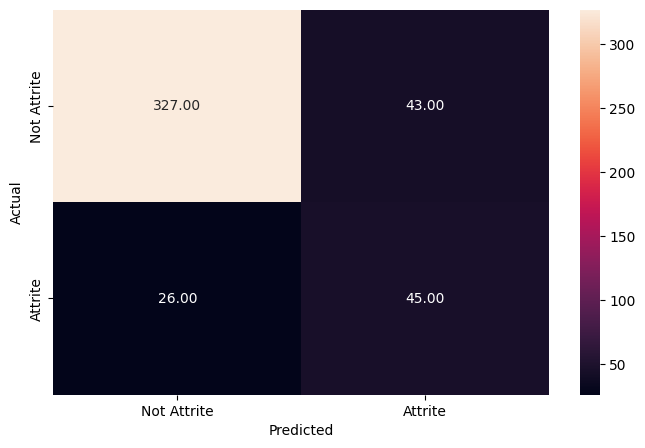

In [35]:
# Testing our tuned model on test data.
y_pred_test_lr = lr.predict_proba(x_test)
get_metrics(y_test, y_pred_test_lr[:, 1] > 0.35)

## Observations:
- The model is giving similar results for test data. The model has generalized well. 
- The recall is 63% which is similar to what we have seen in linear Determinant Analysis.

## KNN
Process to follow:
1. Select the K.
2. Calculated distances
3. Find K Closest Neighbors
4. Vote for labels

### Finding and selecting the K

#### Process of finding K
1. Iterate over a few values of k, I am taking from 1 to 15. 
2. Split the train set into new train and validation set 30 time.
3. Scale the training and validation set.
4. take average error on these train and validation set for each k.
5. Plot the average train vs validation set errors for all ks.
6. Choose the value of k where the two errors are comparable.

In [36]:
# We select the best value of K for which error rate is least in the validation set.
# Let us loop over values of k from 1 to 15.
knn_many_split = {}

error_df_knn = pd.DataFrame()
features = X.columns

for k in range(1, 15):
    train_error = []
    test_error = []
    list_averages = []
    knn = KNeighborsClassifier(n_neighbors=k)
    for i in range(30):
        x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x_train, y_train, test_size=0.2)
        
        # Fitting knn on the new training data
        knn.fit(x_train_new, y_train_new)
        # Calculating the error on training set and validation set
        train_error.append(1 - knn.score(x_train_new, y_train_new))
        test_error.append(1 - knn.score(x_test_new, y_test_new))
    list_averages.append(sum(train_error)/len(train_error))
    list_averages.append(sum(test_error)/len(test_error))
    knn_many_split[k] = list_averages
    
knn_many_split

{1: [0.0, 0.21229773462783177],
 2: [0.11996759821790201, 0.1739482200647249],
 3: [0.11032806804374239, 0.17928802588996767],
 4: [0.14370190360469826, 0.16310679611650486],
 5: [0.14038072093965168, 0.16213592233009708],
 6: [0.14831915755366545, 0.1614886731391586],
 7: [0.14017820980153906, 0.166990291262136],
 8: [0.15026326447954635, 0.1551779935275081],
 9: [0.14455245038477116, 0.16132686084142395],
 10: [0.1502227622519239, 0.155663430420712],
 11: [0.14682057513163224, 0.16051779935275082],
 12: [0.1513163223977319, 0.16148867313915863],
 13: [0.15131632239773188, 0.15307443365695797],
 14: [0.15439449169704333, 0.1509708737864078]}

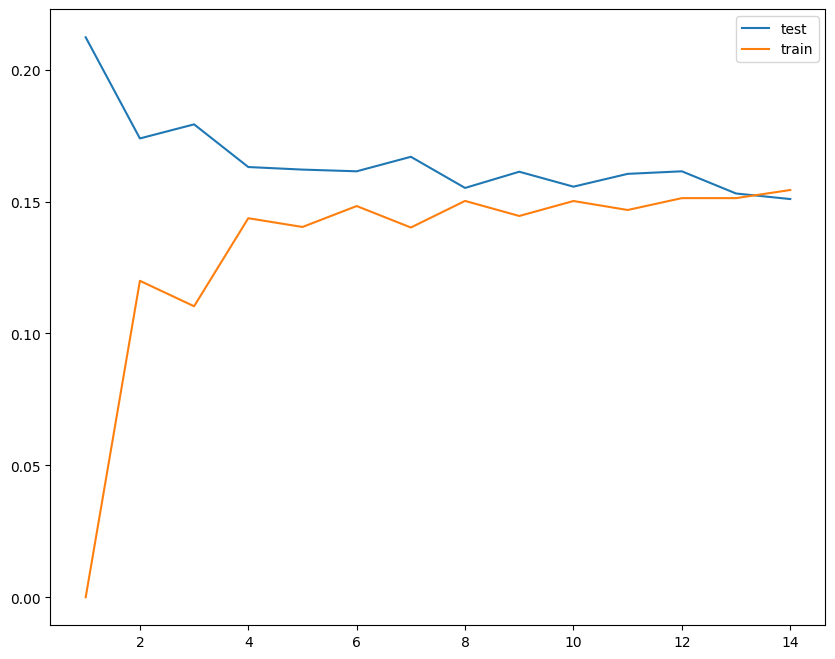

In [37]:
kltrain = []
kltest = []
vltrain = []
vltest = []
for k, v in knn_many_split.items():
    kltrain.append(k)
    kltest.append(k)
    vltrain.append(v[0])
    vltest.append(v[1])

# Plotting k vs errors
plt.figure(figsize=(10, 8))
plt.plot(kltest, vltest, label="test")
plt.plot(kltrain, vltrain, label= "train")
plt.legend()
plt.show()

## Observations:
- We can see that error rates are more or less similar after k=5. Train error shows a slight increasing trend.
- k=5 will give us better fit and lower error rate.
- A higher value of k will make the model biased.
- lets fix k = 5.

In [38]:
# Defining the knn model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       863
           1       0.73      0.20      0.31       166

    accuracy                           0.86      1029
   macro avg       0.80      0.59      0.62      1029
weighted avg       0.84      0.86      0.82      1029



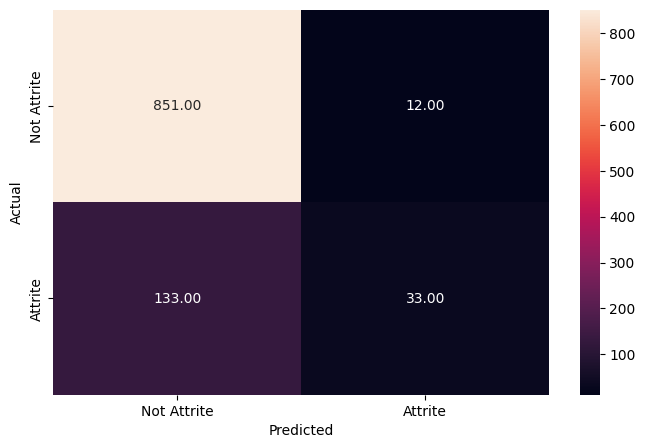

In [39]:
# Lets check the performance of our model
y_pred_train_knn = knn.predict(x_train)
get_metrics(y_train, y_pred_train_knn)

# Observations:
- The recall value is too low for 1. This will be a disaster model for the company!!!!

Anyway lets check how it performs on test set

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       370
           1       0.65      0.28      0.39        71

    accuracy                           0.86       441
   macro avg       0.76      0.63      0.66       441
weighted avg       0.84      0.86      0.84       441



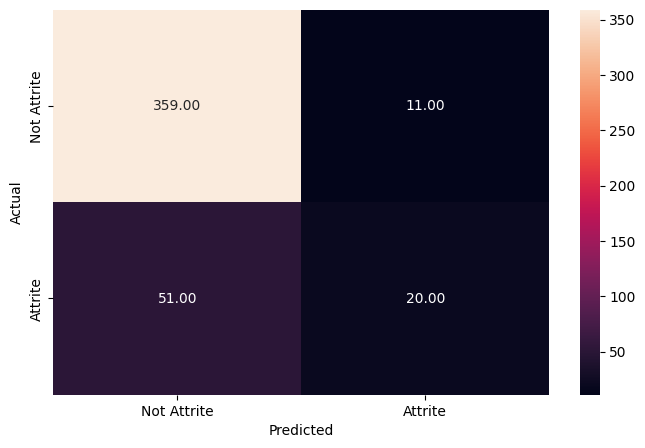

In [40]:
y_pred_test_knn = knn.predict(x_test)
get_metrics(y_test, y_pred_test_knn)

# Observations:
- The model is generalized well and predicts similar results for train and test.
- The recall value for 1, where we predict that employee will not attrite but he will is too low, 28% for test set.

**We either finetune the model or discard this and recommend previous models with better recall**

## Hyperparameter Tuning
- Lets use GridSearchCV.
- We are experimenting here, we don't know if this tuning will make the model better!!!
- Grid search will try to tune all the hyper parametes of the model by exhaustive searching.
- The parameters are optimized by cross-validating grid search over the parameter grid.

### What are our parametes anyway?
- n_neighbors : Thats a given, isn't it?
- weights: uniform and distance
    - Uniform: all points in a neighborhood are weighed equally.
    - Distance: weight points by inverse of their distance. Closer points will have higher weights and farther the points get weights decrease.
- p : This is the parameter which specifies either Euclidean distance or Manhattan distance.
    - p=1 Manhattan Distance.
    - p=2 Euclidean distance.
    
**Lets Roll Guys**

In [41]:
params = {
    "n_neighbors": np.arange(3, 15),
    "weights": ["uniform", "distance"],
    "p": [1, 2]
}

# We are working on recall : well that's our objective 
grid_knn = GridSearchCV(estimator=knn, param_grid=params, scoring="recall", cv=10)
model_knn = grid_knn.fit(x_train, y_train)
knn_estimator = model_knn.best_estimator_
print(knn_estimator)

KNeighborsClassifier(n_neighbors=4, p=1, weights='distance')


### So we have n_neighbors =4 (we selected 5) p=1  and weights=distance (I don't know what was selected previously for p and weights)

In [42]:
# Lets fit the data on best estimator
knn_estimator.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4, p=1, weights='distance')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       863
           1       1.00      1.00      1.00       166

    accuracy                           1.00      1029
   macro avg       1.00      1.00      1.00      1029
weighted avg       1.00      1.00      1.00      1029



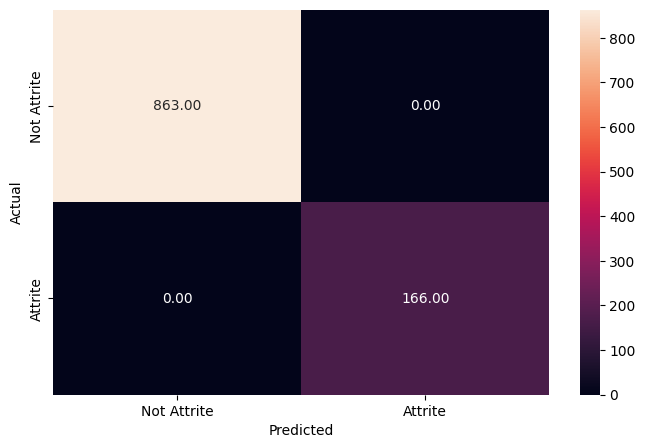

In [43]:
# Lets see the performance results now.
y_pred_train_knn_estimator = knn_estimator.predict(x_train)
get_metrics(y_train, y_pred_train_knn_estimator)

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       370
           1       0.55      0.25      0.35        71

    accuracy                           0.85       441
   macro avg       0.71      0.61      0.63       441
weighted avg       0.82      0.85      0.82       441



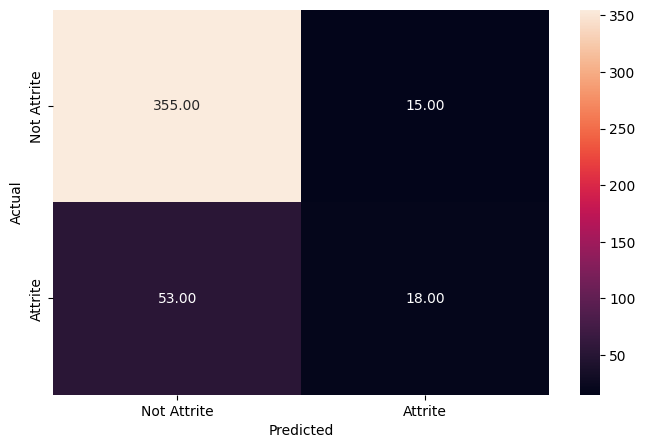

In [44]:
# Lets look at the test set results 
y_pred_test_knn_estimator = knn_estimator.predict(x_test)
get_metrics(y_test, y_pred_test_knn_estimator)

## Observations:
- The model is overfitting.
- We cannot use this model.

## Conclusion
**The best model the company can use is either LDA or Logistic Regression to predict the attrition**

- The company will have to bear the cost of losing some talent.
- We could tune the models maybe. But for now my conclusion would be to work on identified variables which are affecting the employee attrition and use the predicted model with a pinch of Salt.!!!!!!!